<a href="https://colab.research.google.com/github/kevinlu2/COMP5318-Machine-Learning-and-Data-Mining/blob/master/Labs/Lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5318 - Machine Learning and Data Mining 

## Tutorial 5 - Classification I

**Semester 2, 2020**

**Objectives:**

* To learn about k-NN classification algorithm. 
* To learn about bag of words features and naïve Bayes classifier.
* To evaluate classification performance measures.

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab5.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab5.ipynb" file
* Complete exercises in "lab5.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Nguyen Hoang Tran 

Tutors: Canh Dinh, Chen Chen, Claire Hardgrove, Fengxiang He, Henry Weld, Yixuan Zhang, Zhiyi Wang, Thomas Selvaraj.

## 1. k-nearest neighbors (k-NN) classification algorithm

#### Toy Example

In [1]:
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline

*Step 1:* **Loading data**

In [2]:
X = np.asarray(([2,1,3,5,3,10,9,5,8,11,15,13,16],[1,0,3,5,2,12,11,10,7,9,11,15,16])).T
y = np.asarray([0,0,0,0,0,1,1,1,1,1,2,2,2])[:,np.newaxis]  # np.asarray([0,0,0,0,0,1,1,1,1,1,2,2,2])[:,None] - column vector

print('X=\n',X)
print('y=\n',y)

X=
 [[ 2  1]
 [ 1  0]
 [ 3  3]
 [ 5  5]
 [ 3  2]
 [10 12]
 [ 9 11]
 [ 5 10]
 [ 8  7]
 [11  9]
 [15 11]
 [13 15]
 [16 16]]
y=
 [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]]


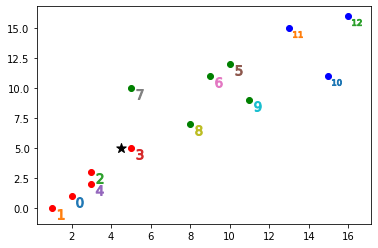

In [3]:
N = len(y)

X_q = np.asarray(([4.5],[5])).T #query point

pos_of_class0 = np.where(y==0)[0] #class 0 points
pos_of_class1 = np.where(y==1)[0] #class 1 points
pos_of_class2 = np.where(y==2)[0] #class 2 points

pl.scatter(X[pos_of_class0,0], X[pos_of_class0,1], c='r') #class = 0
pl.scatter(X[pos_of_class1,0], X[pos_of_class1,1], c='g') #class = 1
pl.scatter(X[pos_of_class2,0], X[pos_of_class2,1], c='b') #class = 2
pl.scatter(X_q[:,0], X_q[:,1], marker='*', s=100, c='k') #class to be determined
for i in range(N): 
    pl.scatter(X[i,0]+0.4, X[i,1]-0.5, s=100, marker="$ {} $".format(i)) #positions 

*Step 2:* **Determining the nearest neighbors**

In [4]:
dis = ((X - X_q)**2).sum(axis=1) #calculate distance between X_q and each training point
arg_ascending = np.argsort(dis) #arrange distances in the ascending order

np.set_printoptions(precision=3)
print('Distance between X_q and each training point= \n', dis)
print('Index of nearest neighbors in training data=\n', arg_ascending) #Check the plot in Step 1

Distance between X_q and each training point= 
 [2.225e+01 3.725e+01 6.250e+00 2.500e-01 1.125e+01 7.925e+01 5.625e+01
 2.525e+01 1.625e+01 5.825e+01 1.462e+02 1.722e+02 2.532e+02]
Index of nearest neighbors in training data=
 [ 3  2  4  8  0  7  1  6  9  5 10 11 12]


*Step 3:* **Determining the classes of k-nearest neighbors**

In [5]:
K = 5 #Let us consider 5-nearest neighbors 

classes = np.zeros(3)
for i in range(K):
    if y[arg_ascending[i]]==0: #class = 0
        print(i, 'th nearest neighbor belongs to class 0.')
        classes[0] += 1
    elif y[arg_ascending[i]]==1: #class = 1
        print(i, 'th nearest neighbor belongs to class 1.')
        classes[1] += 1
    elif y[arg_ascending[i]]==2: #class = 2
        print(i, 'th nearest neighbor belongs to class 2.')
        classes[2] += 1
    else:
        print('Error - Invalid class')

0 th nearest neighbor belongs to class 0.
1 th nearest neighbor belongs to class 0.
2 th nearest neighbor belongs to class 0.
3 th nearest neighbor belongs to class 1.
4 th nearest neighbor belongs to class 0.


*Step 4:* **Determining the class of X_q**

In [6]:
prob = classes/K

print('classes', classes)
print('probabilities=', prob)
print('ANSWER: X_q blongs to', np.argmax(prob), 'th class!')

classes [4. 1. 0.]
probabilities= [0.8 0.2 0. ]
ANSWER: X_q blongs to 0 th class!


### Decision Surface 

In [16]:
def calc_knn(X, y, K, X_q):
    dis = ((X - X_q)**2).sum(axis=1) #calculate distance between X_q and each training point
    arg_ascending = np.argsort(dis)
    
    classes = np.zeros(3)
    for i in range(K):
        if y[arg_ascending[i]]==0: #class = 0
            classes[0] += 1
        elif y[arg_ascending[i]]==1: #class = 1
            classes[1] += 1
        elif y[arg_ascending[i]]==2: #class = 2
            classes[2] += 1
        else:
            print('Error - Invalid class')
            
    return np.argmax(classes)

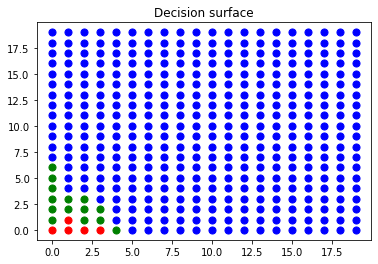

In [17]:
for i in range(20):
    for j in range(20):
        X_q = np.asarray(([i],[j])).T #query point
        class_out = calc_knn(X, y, 4, X_q)
        
        if class_out ==0:
            pl.scatter(X_q[:,0], X_q[:,1], s=50, c='r')
        elif class_out ==1:
            pl.scatter(X_q[:,0], X_q[:,1], s=50, c='g')
        else:
            pl.scatter(X_q[:,0], X_q[:,1], s=50, c='b')
            
pl.title('Decision surface')
pl.show()

**Exercise 1.1 (optional):** Plot *p(class=0|Data, K)*, *p(class=1|Data, K)* and *p(class=2|Data, K)*.

### Confusion Matrix

In [11]:
import pandas as pd
g = pd.read_csv('training.csv',delimiter=',').values
X = np.float_(g[:,0:2])
y = np.float_(g[:,2:3])
print(X.shape, y.shape)

(150, 2) (150, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


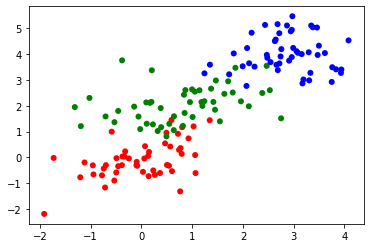

In [12]:
N = len(y)

pos_of_class0 = np.where(y==0)[0] #positions of class 0
pos_of_class1 = np.where(y==1)[0] #positions of class 1
pos_of_class2 = np.where(y==2)[0] #positions of class 2

pl.scatter(X[pos_of_class0,0], X[pos_of_class0,1], c='r', edgecolor='') #class = 0
pl.scatter(X[pos_of_class1,0], X[pos_of_class1,1], c='g', edgecolor='') #class = 1
pl.scatter(X[pos_of_class2,0], X[pos_of_class2,1], c='b', edgecolor='') #class = 2

**Exercise 1.2.** Determine the class of X_q data in test.csv. Hence develop the confusion matrix

In [14]:
import pandas as pd
g_test = pd.read_csv('test.csv',delimiter=',').values
X_test = np.float_(g_test[:,0:2])
y_test = np.float_(g_test[:,2:3])

In [19]:
out_class = np.empty((len(y_test),1))
for i in range(len(y_test)):
    out_class[i,0] = calc_knn(X, y, 4, X_test[i,:])

#print(np.hstack((out_class,y_test)))
#TODO
pair = np.hstack((out_class,y_test))
pair = pair.astype(int)
confusion_matrix = np.zeros((3,3))

for i in pair:
  confusion_matrix[i[1], i[0]] += 1
print(confusion_matrix)


[[17.  3.  0.]
 [ 1. 19.  0.]
 [ 0.  1. 19.]]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, out_class)

## Naïve Bayes Classifier (NBC)

Bayesian inference is based on,

\begin{equation}
    posterior = \frac{likelihood \times prior}{evidence}
\end{equation}

The main assumption in naïve Bayes is ***conditional independence***.

The naïve Bayes classifier (NBC) is given by,
\begin{equation}
    \hat{y} = \text{argmax}_{k \in {1,2,...K}} \Big( p(C_k) \prod_{j=1}^D p(x_j|C_k) \Big) \in \{C_k\}_{k=1}^K
\end{equation}

where $C_k$ is the $k^{th}$ class when there are $K$ classes. If $K=2$, i.e. $k \in \{1,2\}$, then the classifier is called a binary classifier.

Let us consider a simple spam filtering algorithm based on the Nave bayes binary classifier..

The following algorithm is only for demonstration. It can be developed more efficiently. Read Section 3.5 of Machine Learning Kevin by P. Murphy for more information.

*Step 1:* **Define training data and vocabulary.**

In [ ]:
import numpy as np

spam = [['million dollar offer'],
        ['secret offer today'],
        ['send your password online to win one million'],
        ['send ten dollar to win million dollar'],
        ['confirm your secret password to win monthly gifts']]

ham =[['christmas offer for our valued qantas customer'],
      ['confirm your monthly bill online or by calling to customer services'],
      ['win by booking it using qantas points'],
      ['dear customer : confirm your booking']]

voc = ['million', 'dollar', 'offer', 'send', 'password', 'win', 'customer', 'booking', 'bill', 
       'online', 'monthly', 'qantas', 'confirm']

#Note: some sentences are deformed for simplicity. 

*Step 2*: **Calculate class probabilities.**

In [ ]:
def calc_class_prob(cat, voc): #cat=ham or spam  and voc=voc
    class_prob = np.zeros((len(voc),1)) #define a 'zeros' array to store class probabilities
    for ith_class_email in cat: #for each email in cat
        words_in_ith_class_email = ith_class_email[0].split() #split the ith email into words
        words_in_ith_class_email = list(set(words_in_ith_class_email)) #remove duplicated words
        for word in words_in_ith_class_email: #for each word in the splitted email
            i = 0
            for voc_word in voc: #for each element in voc
                if voc_word in word:
                    class_prob[i] += 1 # incrmenet the ith element of class_prob, if voc element is in word
                i += 1
    return class_prob/len(cat) #divide the count by length of cat

In [ ]:
ham_class_prob = calc_class_prob(ham, voc)
spam_class_prob = calc_class_prob(spam, voc)

print(ham_class_prob)
print(spam_class_prob)

*Step 3:* **Determine if words in a new email are in the vocabulary.**

In [ ]:
new = ['win online offer'] #new email

prob_vector = np.zeros((len(voc)), dtype=bool) #define a 'True' array to store class probabilities
words_in_new = new[0].split() #split the new email into words
words_in_new = list(set(words_in_new)) #remove duplicated words
i = 0
for voc_word in voc: #for each element in voc
    if voc_word in words_in_new: 
        prob_vector[i] = True #set the ith element of prob_vector to True, if voc element is in word
    else:
        prob_vector[i] = False #set the ith element of prob_vector to False, otherwise
    i += 1
print(prob_vector)

*Step 4:* **Considering independence, calculate the probabilities that word in the new email appear in i) ham messages ii) spam messages**

In [ ]:
prob_ham = 1
for i in range(len(prob_vector)):
    if prob_vector[i] == True:
        prob_ham *= ham_class_prob[i]
    else:
        prob_ham *= (1 - ham_class_prob[i])
#alternative: np.prod(ham_class_prob[np.where(prob_vector==True)]) * np.prod(1-ham_class_prob[np.where(prob_vector==False)])
        
prob_spam = 1
for i in range(len(prob_vector)):
    if prob_vector[i] == True:
        prob_spam *= spam_class_prob[i]
    else:
        prob_spam *= (1 - spam_class_prob[i])

print(prob_ham, prob_spam)

*Step 5:* **If 30% of emails are typically spams, calculate the probability that the *new* email is a spam.**

In [ ]:
p_spam = 0.3
p_ham = 1 - p_spam

p_spam_given_new = (prob_spam*p_spam)/(prob_spam*p_spam + prob_ham*p_ham) #Bayes theorem
print('p(spam|new_email)=', p_spam_given_new[0])

## Classifier Performance

\begin{equation}
    Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

\begin{equation}
    Precision (p) = \frac{TP}{TP+FP}
\end{equation}

\begin{equation}
    Recall (r) = \frac{TP}{TP+FN}
\end{equation}

\begin{equation}
    F\_measure (F) = \frac{2rp}{r+p} = \frac{2TP}{2TP+FN+FP}
\end{equation}

\begin{equation}
    TPR = \frac{TP}{TP+FN} 
\end{equation}

\begin{equation}
    FPR = \frac{FP}{FP+TN} 
\end{equation}

Receiver Operating Characteristic (ROC) is a plot of TPR vs FPR. 

Note that area=0.5 for random guess and area=1 for an idean classifier.

**Exercise 2.1:** Develop the confusion matrix and calculate precision, recall and F-measure based on the following test set. Calculate the area under Receiver Operating Characteristic (ROC).

Refer: 
       https://ccrma.stanford.edu/workshops/mir2009/references/ROCintro.pdf
       http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
spam = [['secret million dollar'],
        ['secret offer today']]

ham =[['confirm christmas'],
      ['qantas monthly booking']]

#TODO
#Step 1: Construct a method to obtain the confusion matrix for a binary classifier for a given threshold
#Step 2: Call the method in Step 1 for different threshold values and hence calculate tpr and fpr

**Exercise 2.2 (optional):**  Extend the NBC to Bernoulli/Gaussian naive Bayes classifier by considering the full Bayesian treatment. 